<a href="https://colab.research.google.com/github/rohitrawate/Engineering/blob/main/FNN_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rohit Rawate** 

*2.FNN using Keras and TensorFLow*

Assignment : Deep Learning 

In [52]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist


In [53]:
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse


In [54]:
print("[INFO accessing MNIST...]")
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

[INFO accessing MNIST...]


In [55]:
X_train.shape


(60000, 28, 28)

In [56]:
X_test.shape

(10000, 28, 28)

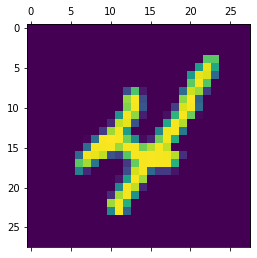

In [57]:
# plt.matshow(X_train[0])
plt.matshow(X_train[9])


In [58]:
# X_train = X_train.reshape((X_train.shape[0] , 28*28*1))
# X_test = X_test.reshape((X_test.shape[0] , 28*28*1))
# X_train =X_train.astype("float32")/ 255
# X_test =X_test.astype("float32")/ 255
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [59]:
X_test.shape # (10000, 784)

X_train.shape # (60000, 784)

(60000, 784)

In [60]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test  =  lb.transform(Y_test)

In [61]:
# building the model 
model = Sequential()
keras.layers.Flatten(input_shape=(28, 28)),
model.add(Dense(128 , input_shape = (784,) , activation= 'sigmoid') )
model.add(Dense(64 , activation = 'sigmoid'))
model.add(Dense (10 , activation = 'softmax'))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [64]:
sgd = SGD(0.01)
epochs =10
# loss='binary_crossentropy' activation='sigmoid'
model.compile( loss = "categorical_crossentropy" , optimizer=sgd , metrics=["accuracy"])
# model.compile( loss='binary_crossentropy', optimizer=sgd , metrics=["accuracy"])

#  H (history)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=128)



Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 2.2305 - accuracy: 0.3520 - val_loss: 2.1996 - val_accuracy: 0.3565
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 2.1682 - accuracy: 0.4613 - val_loss: 2.1251 - val_accuracy: 0.5208
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 2.0811 - accuracy: 0.5330 - val_loss: 2.0194 - val_accuracy: 0.5646
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 1.9593 - accuracy: 0.5802 - val_loss: 1.8753 - val_accuracy: 0.5853
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 1.8009 - accuracy: 0.6103 - val_loss: 1.6986 - val_accuracy: 0.6582
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 1.6200 - accuracy: 0.6573 - val_loss: 1.5114 - val_accuracy: 0.6929
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 1.4389 - accuracy: 0.6987 - val_loss: 1.3365 - val_accuracy: 0.7240
Epoch 

In [75]:
from tensorflow.python.ops.math_ops import argmax
#making the predictions
predictions = model.predict(X_test, batch_size = 128)
print("Classification Report\n " + classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1) , target_names= [str(x) for x in lb.classes_]) )
# print(predictions.argmax(axis=1))

79/79 [==============================] - 0s 3ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       980
           1       0.79      0.98      0.88      1135
           2       0.81      0.74      0.77      1032
           3       0.65      0.84      0.73      1010
           4       0.77      0.82      0.80       982
           5       0.84      0.38      0.52       892
           6       0.83      0.89      0.86       958
           7       0.83      0.86      0.84      1028
           8       0.85      0.62      0.72       974
           9       0.77      0.73      0.75      1009

    accuracy                           0.79     10000
   macro avg       0.80      0.78      0.78     10000
weighted avg       0.80      0.79      0.78     10000



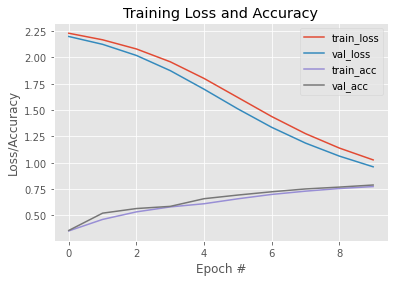

In [82]:
# plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0 , epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"] , label= "train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label= "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()